In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df=pd.read_json('banksdata.json')

In [51]:
df

,Bank Name,Rank,"Total Assets (2023, US$ billion)"
0,Industrial and Commercial Bank of China,1,"6,303.44"
1,Agricultural Bank of China,2,"5,623.12"
2,China Construction Bank,3,"5,400.28"
3,Bank of China,4,"4,578.28"
4,JPMorgan Chase,5,"3,875.39"
...,...,...,...
95,Raiffeisen Group,96,352.87
96,Handelsbanken,97,351.79
97,Industrial Bank of Korea,98,345.81
98,DNB,99,339.21


In [52]:
df.isnull().sum()

Bank Name                           0
Rank                                0
Total Assets (2023, US$ billion)    0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.loc[4]

Bank Name                           JPMorgan Chase
Rank                                             5
Total Assets (2023, US$ billion)          3,875.39
Name: 4, dtype: object

In [56]:
df.iloc[14]

Bank Name                           Bank of Communications
Rank                                                    15
Total Assets (2023, US$ billion)                  1,982.89
Name: 14, dtype: object

In [57]:
df.head()

,Bank Name,Rank,"Total Assets (2023, US$ billion)"
0,Industrial and Commercial Bank of China,1,"6,303.44"
1,Agricultural Bank of China,2,"5,623.12"
2,China Construction Bank,3,"5,400.28"
3,Bank of China,4,"4,578.28"
4,JPMorgan Chase,5,"3,875.39"


In [58]:
df.tail()

,Bank Name,Rank,"Total Assets (2023, US$ billion)"
95,Raiffeisen Group,96,352.87
96,Handelsbanken,97,351.79
97,Industrial Bank of Korea,98,345.81
98,DNB,99,339.21
99,Qatar National Bank,100,338.14


In [59]:
df.head(10)

,Bank Name,Rank,"Total Assets (2023, US$ billion)"
0,Industrial and Commercial Bank of China,1,"6,303.44"
1,Agricultural Bank of China,2,"5,623.12"
2,China Construction Bank,3,"5,400.28"
3,Bank of China,4,"4,578.28"
4,JPMorgan Chase,5,"3,875.39"
5,Bank of America,6,"3,180.15"
6,HSBC,7,"2,919.84"
7,BNP Paribas,8,"2,867.44"
8,Mitsubishi UFJ Financial Group,9,"2,816.77"
9,Crédit Agricole,10,"2,736.95"


In [60]:
df.tail(10)

,Bank Name,Rank,"Total Assets (2023, US$ billion)"
90,Caixa Econômica Federal,91,377.29
91,Erste Group,92,372.67
92,Landesbank Baden-Württemberg,93,368.41
93,Bank of Ningbo,94,365.96
94,SEB Group,95,358.79
95,Raiffeisen Group,96,352.87
96,Handelsbanken,97,351.79
97,Industrial Bank of Korea,98,345.81
98,DNB,99,339.21
99,Qatar National Bank,100,338.14


In [61]:
df.describe()

,Rank
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Bank Name                         100 non-null    object
 1   Rank                              100 non-null    int64 
 2   Total Assets (2023, US$ billion)  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [63]:
df['Rank']<=10

0      True
1      True
2      True
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Rank, Length: 100, dtype: bool

In [64]:
df['Bank Name'].value_counts()

Bank Name
Industrial and Commercial Bank of China    1
DBS Group                                  1
Charles Schwab Corporation                 1
China Guangfa Bank                         1
Bank of Beijing                            1
                                          ..
Shanghai Pudong Development Bank           1
Crédit Mutuel                              1
China CITIC Bank                           1
Toronto-Dominion Bank                      1
Qatar National Bank                        1
Name: count, Length: 100, dtype: int64

In [65]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]


for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

In [66]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [67]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  1


,Rank
0,1
1,2
2,3
3,4
4,5


In [68]:
df.Rank.quantile(0.80)

80.2

In [69]:
df['Total Assets (2023, US$ billion)'].value_counts().head(10)


Total Assets (2023, US$ billion)
6,303.44    1
560.10      1
493.18      1
495.55      1
503.31      1
520.34      1
527.53      1
533.48      1
535.35      1
542.81      1
Name: count, dtype: int64

In [70]:
df['Rank'].value_counts().head(10)

Rank
1     1
64    1
74    1
73    1
72    1
71    1
70    1
69    1
68    1
67    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Banks')

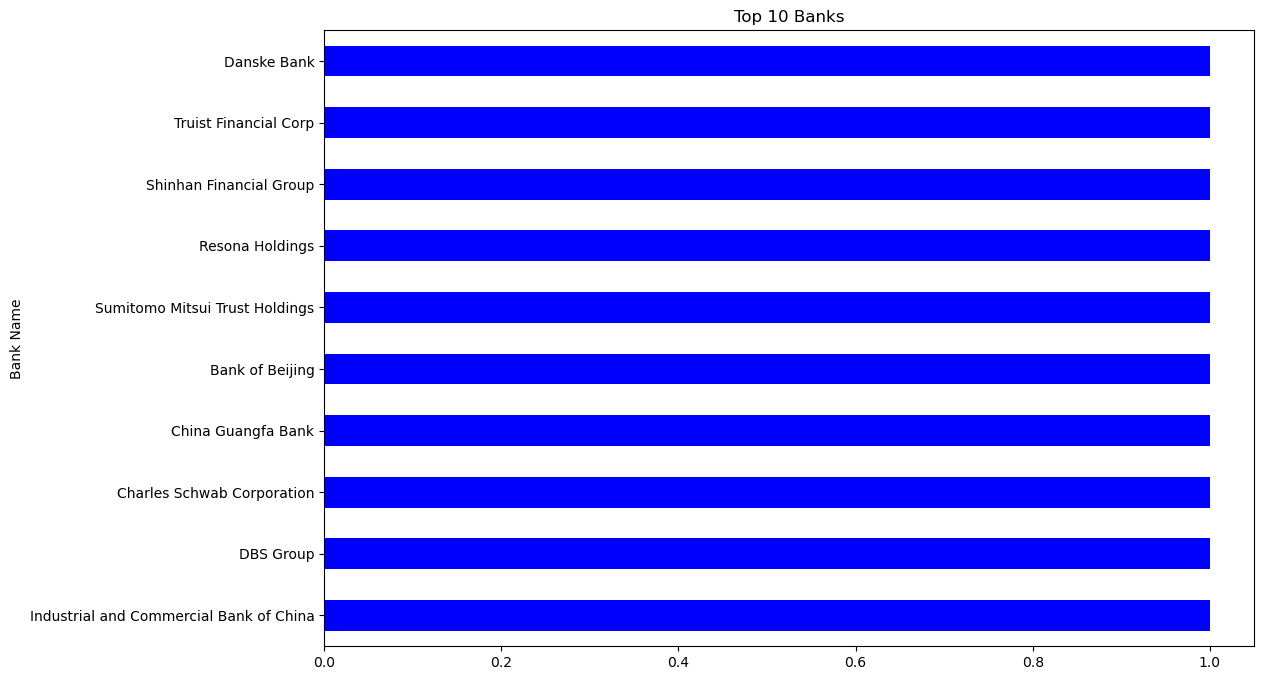

In [71]:
df['Bank Name'].value_counts().head(10).plot(kind='barh', figsize=(12,8), color='blue')
plt.title('Top 10 Banks')


Text(0.5, 1.0, 'Top 10 Banks by Total Assets (2023, US$ billion)')

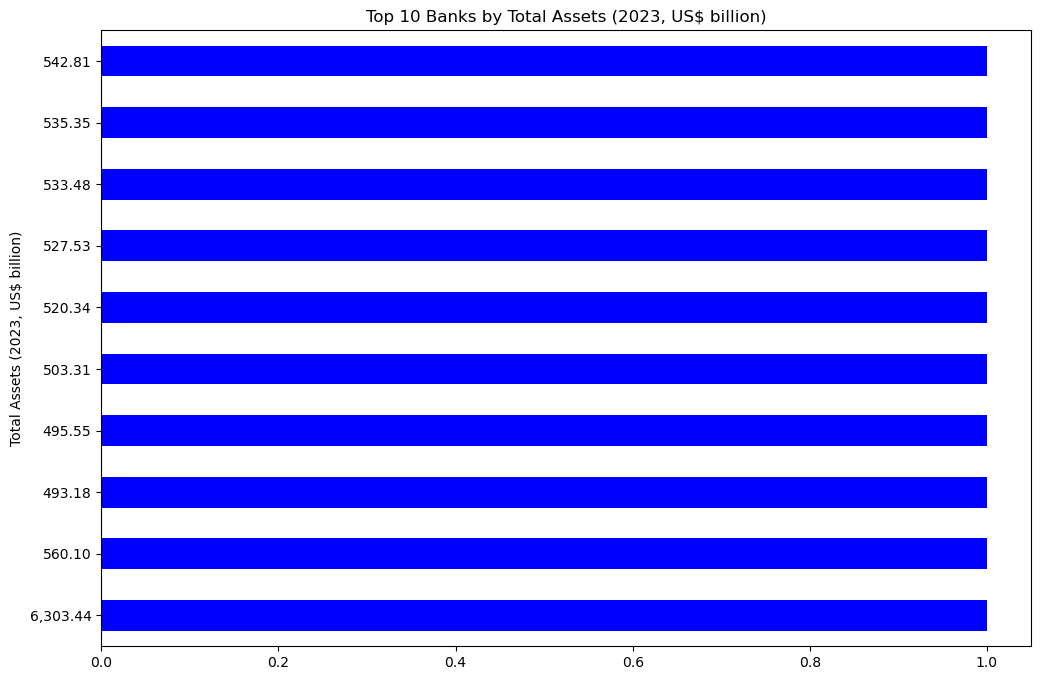

In [72]:
df['Total Assets (2023, US$ billion)'].value_counts().head(10).plot(kind='barh', figsize=(12,8), color='blue')
plt.title('Top 10 Banks by Total Assets (2023, US$ billion)')

C:\Users\Raghav\AppData\Local\Temp\ipykernel_7956\3379576009.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total Assets (2023, US$ billion)'], shade=True)


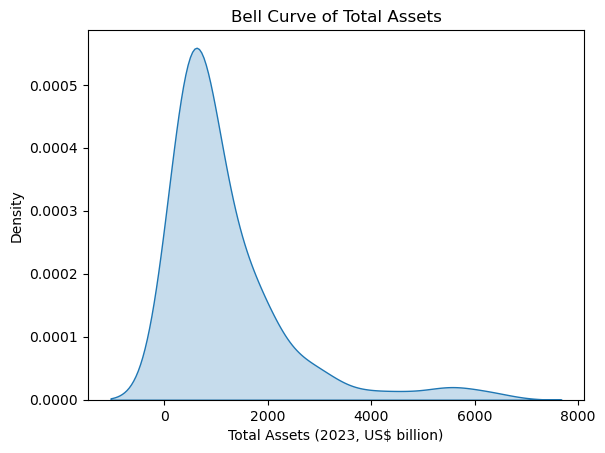

In [73]:
import matplotlib.pyplot as plt

# Convert 'Total Assets (2023, US$ billion)' to numeric
df['Total Assets (2023, US$ billion)'] = df['Total Assets (2023, US$ billion)'].str.replace(',', '').astype(float)

# Plot the bell curve
sns.kdeplot(df['Total Assets (2023, US$ billion)'], shade=True)
plt.title('Bell Curve of Total Assets')
plt.xlabel('Total Assets (2023, US$ billion)')
plt.ylabel('Density')
plt.show()

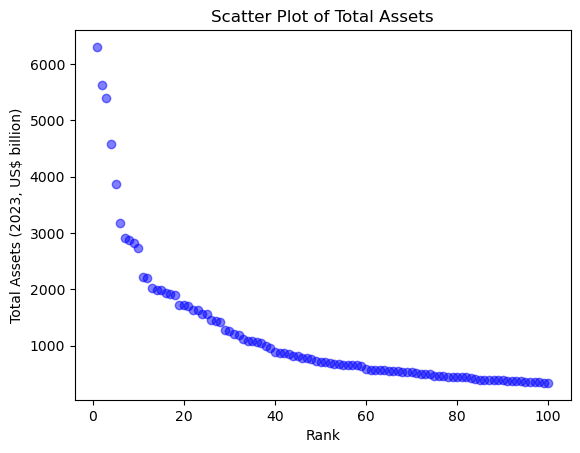

In [74]:
import matplotlib.pyplot as plt


df['Total Assets (2023, US$ billion)'] = df['Total Assets (2023, US$ billion)'].astype(str).str.replace(',', '').astype(float)

# Scatter plot
plt.scatter(df['Rank'], df['Total Assets (2023, US$ billion)'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Total Assets')
plt.xlabel('Rank')
plt.ylabel('Total Assets (2023, US$ billion)')
plt.show()

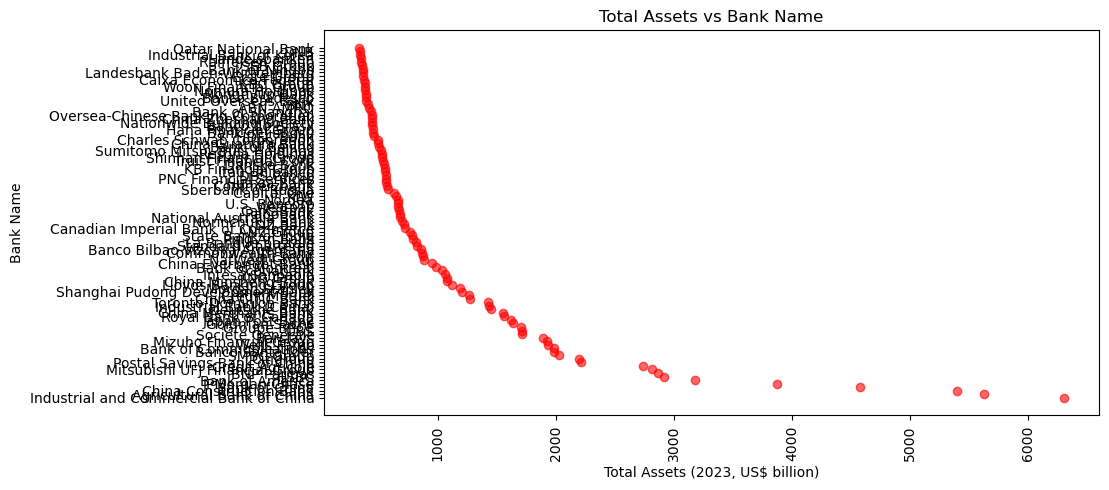

In [75]:
import matplotlib.pyplot as plt

# Ensure 'Total Assets' is properly formatted
df['Total Assets (2023, US$ billion)'] = df['Total Assets (2023, US$ billion)'].astype(str).str.replace(',', '').astype(float)

# Scatter plot: Total Assets vs Bank Name
plt.figure(figsize=(10, 5))
plt.scatter(df['Total Assets (2023, US$ billion)'], df['Bank Name'], color='red', alpha=0.6)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Total Assets vs Bank Name')
plt.xlabel('Total Assets (2023, US$ billion)')
plt.ylabel('Bank Name')
plt.show()

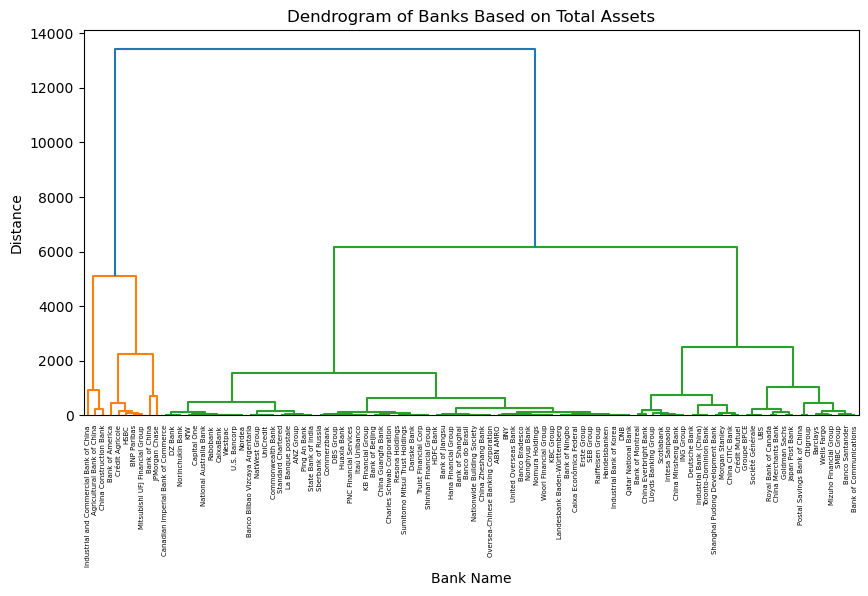

In [76]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd

# Ensure 'Total Assets' is properly formatted
df['Total Assets (2023, US$ billion)'] = df['Total Assets (2023, US$ billion)'].astype(str).str.replace(',', '').astype(float)

# Convert data into a NumPy array for hierarchical clustering
X = df[['Total Assets (2023, US$ billion)']].values

# Perform hierarchical clustering and create linkage matrix
linkage_matrix = sch.linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendro = sch.dendrogram(linkage_matrix, labels=df['Bank Name'].values, orientation='top', leaf_rotation=90)
plt.title('Dendrogram of Banks Based on Total Assets')
plt.xlabel('Bank Name')
plt.ylabel('Distance')
plt.show()

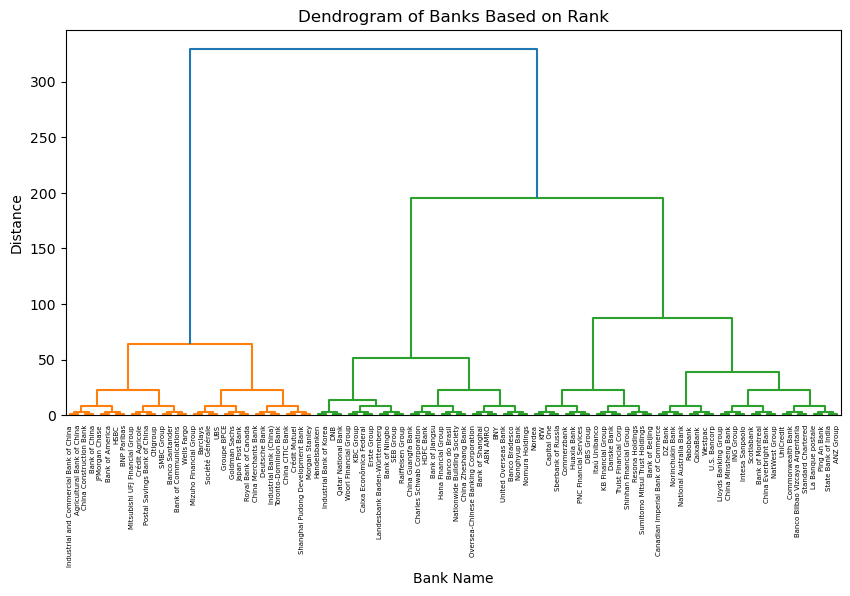

In [77]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import numpy as np
import pandas as pd

# Ensure 'Total Assets' is properly formatted
df['Total Assets (2023, US$ billion)'] = df['Total Assets (2023, US$ billion)'].astype(str).str.replace(',', '').astype(float)

# Create rank column (lower rank = higher total assets)
df['Rank'] = df['Total Assets (2023, US$ billion)'].rank(ascending=False)

# Convert rank data into a NumPy array for clustering
X = df[['Rank']].values

# Perform hierarchical clustering based on rank
linkage_matrix = sch.linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendro = sch.dendrogram(linkage_matrix, labels=df['Bank Name'].values, orientation='top', leaf_rotation=90)
plt.title('Dendrogram of Banks Based on Rank')
plt.xlabel('Bank Name')
plt.ylabel('Distance')
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures



In [79]:
# Ensure 'Total Assets' is numeric
df['Total Assets (2023, US$ billion)'] = df['Total Assets (2023, US$ billion)'].astype(str).str.replace(',', '').astype(float)

# Define features (X) and target (y)
X = df[['Rank']]  # Independent variable
y = df['Total Assets (2023, US$ billion)']  # Dependent variable


In [87]:

# Split the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Apply Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)




LinearRegression()

In [88]:
# Predict on the test set
y_pred = model.predict(X_test)

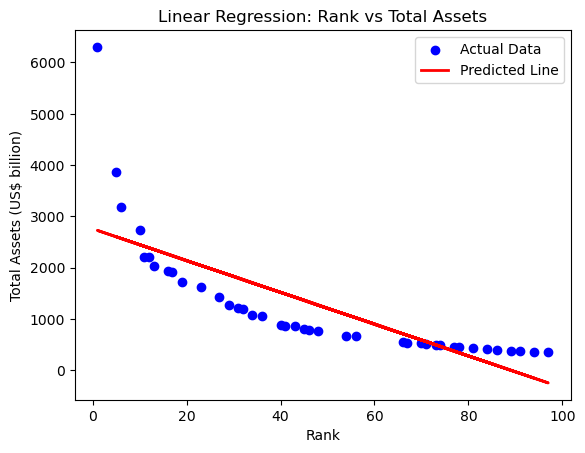

In [89]:
# Plot Results
plt.scatter(X_test, y_test, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted Line")
plt.xlabel("Rank")
plt.ylabel("Total Assets (US$ billion)")
plt.title("Linear Regression: Rank vs Total Assets")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print Accuracy Metrics
print(f"R² Score: {r2:.4f}") 
print(f"Mean Squared Error: {mse:.2f}")  
print(f"Mean Absolute Error: {mae:.2f}")  

R² Score: 0.6062
Mean Squared Error: 527457.88
Mean Absolute Error: 472.97


<Axes: xlabel='Total Assets (2023, US$ billion)'>

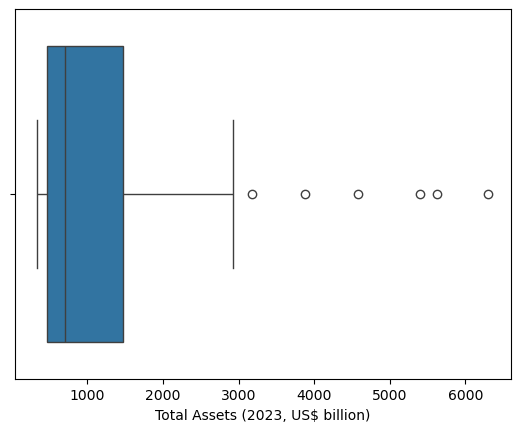

In [93]:
import seaborn as sns

sns.boxplot(x=df["Total Assets (2023, US$ billion)"])  # Detect outliers

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores.mean():.4f}")

Cross-validation scores: -307.3564


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scales Rank for better regression accuracy

In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # Quadratic features
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

LinearRegression()

In [100]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_model.fit(X_train, y_train)

Ridge()

In [99]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1.0)  # L2 Regularization
lasso_model = Lasso(alpha=0.1)  # L1 Regularization

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

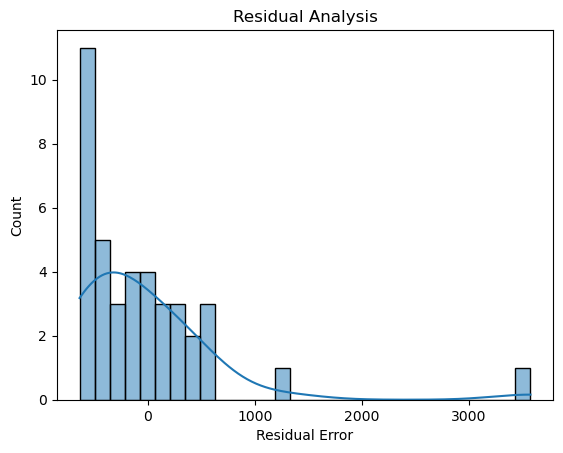

In [101]:
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Analysis")
plt.xlabel("Residual Error")
plt.show()

In [102]:
import numpy as np

confidence_interval = 1.96 * np.std(residuals)
print(f"Confidence Interval: ±{confidence_interval:.2f}")

Confidence Interval: ±1421.06


In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Model Performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print Accuracy Metrics
print(f"R² Score: {r2:.4f}")  # Closer to 1 means better model fit
print(f"Mean Squared Error: {mse:.2f}")  # Lower is better
print(f"Mean Absolute Error: {mae:.2f}")  # Lower is better

R² Score: 0.6062
Mean Squared Error: 527457.88
Mean Absolute Error: 472.97
